<a href="https://colab.research.google.com/github/towardsai/ai-tutor-rag-system/blob/main/notebooks/HF_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q requests==2.32.4 huggingface_hub==0.35.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.4/563.4 kB 12.1 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import login
from google.colab import userdata

login(token=userdata.get('HF_TOKEN'))

# Transformer Pipeline

In [ ]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')

response = generator(
    "Can you please let us know more details about",
    max_new_tokens=100,
    truncation=True,
    pad_token_id=50256
)

response[0]['generated_text']

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


'Can you please let us know more details about this event?\n\nEvent is now closed!'

# Inference Client

## Llama-3 8B

In [ ]:
import os
from huggingface_hub import InferenceClient

client = InferenceClient(api_key=userdata.get('HF_TOKEN'))

completion = client.chat.completions.create(
    model="meta-llama/Llama-3.1-8B-Instruct",
    messages=[
        {
            "role": "user",
            "content": "Write a poem about blue sky."
        }
    ],
)

print(completion.choices[0].message.content)

A canvas of blue, so vast and wide,
A brilliant sight, that touches my inside,
The sky above, a work of art divine,
A perfect blend, of serenity and shine.

The clouds drift by, like feathers in the air,
Soft and white, with just a hint of care,
Their gentle movement, a soothing melody sweet,
As the breeze whispers, a gentle treat.

The blue above, a hue so pure and bright,
A symbol of hope, in the dark of night,
A harbinger of joy, a promise of delight,
A treasure to behold, in all its might.

The sun shines down, with a warm and loving light,
Bringing life to all, in its radiant sight,
The blue sky above, a treasure so rare,
A gift from nature, beyond compare.

So let us bask, in its radiant glow,
And let our spirits, soar and grow,
For in the blue sky, we find our peace,
A sense of calm, that the world can't release.


## Summarization


In [ ]:
text_to_summarize = """Wall Street was quiet Friday ahead of the monthly jobs report.
S&P and Nasdaq futures were little changed and Dow futures were a couple of points lower.
It’s been a shortened week for traders, with markets closing early Wednesday and closed all day Thursday in observance of the July 4th holiday.
Investors are looking for another Goldilocks jobs report Friday that shows a gentle cooling-off of the labor market.
Wednesday’s ADP data, which showed that private payrolls fell to 150,000, created little reaction among traders
— but the government’s monthly tally will likely trigger more of a response."""


In [ ]:
result = client.summarization(
    text=text_to_summarize,
    model="facebook/bart-large-cnn"
)
print(result['summary_text'])


S&P and Nasdaq futures were little changed and Dow futures were a couple of points lower. It’s been a shortened week for traders, with markets closing early Wednesday and closed all day Thursday in observance of the July 4th holiday. Wednesday’S ADP data, which showed that private payrolls fell to 150,000, created little reaction among traders.


## Sentiment Analysis


In [ ]:
text_to_analyse = """I love how this app simplifies complex tasks effortlessly, but I'm extremely frustrated with the frequent crashes, slow performance, and constant errors in the latest update. The bugs make it almost unusable and really overshadow the good parts."""

In [ ]:
from huggingface_hub import InferenceClient

client = InferenceClient(token=userdata.get('HF_TOKEN'))

result = client.text_classification(
    text=text_to_analyse,
    model="cardiffnlp/twitter-roberta-base-sentiment"
)

label_mapping = {
    'LABEL_0': 'NEGATIVE',
    'LABEL_1': 'NEUTRAL',
    'LABEL_2': 'POSITIVE'
}

for result in result:
    readable_label = label_mapping[result.label]
    print(f"Sentiment: {readable_label}, Confidence: {result.score:.4f}")



Sentiment: NEGATIVE, Confidence: 0.5486
Sentiment: NEUTRAL, Confidence: 0.2437
Sentiment: POSITIVE, Confidence: 0.2077


# Local


## Text-to-image


In [ ]:
!pip install -q -U diffusers==0.35.1 transformers==4.56.2 torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.2 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe = pipe.to("cuda")

prompt = """Photorealistic abandoned space station interior, shot on Sony A7SIII. Emergency lights casting red glow on metallic walls,
floating debris in zero gravity. Dust particles catching light, detailed control panels with authentic displays, worn metal
textures. Natural light from Earth visible through cracked viewport. Documentary photography style, high dynamic range."""

negative_prompt = "cartoon, anime, illustration, painted, artificial, oversaturated, low quality, blurry, noisy, text, watermark"

image = pipe(prompt = prompt,
             negative_prompt = negative_prompt,
             guidance_scale=7).images[0]

image.save("space_station.png")

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

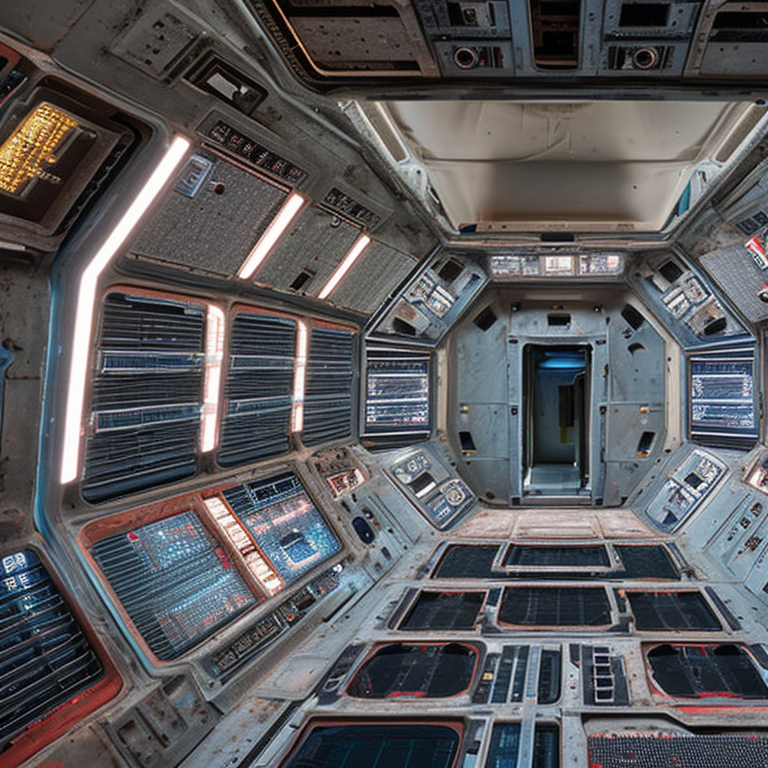

In [ ]:
image

## Generate Text Embeddings


In [ ]:
!pip install -q sentence-transformers==5.1.0

In [ ]:
from sentence_transformers import SentenceTransformer

sentences = [
    """GAIA's questions are rooted in practical use cases, \
requiring AI systems to interact with a diverse and uncertain world, \
reflecting real-world applications.", " GAIA questions require accurate \
execution of complex sequences of actions, akin to the Proof of Work concept, \
where the solution is simple to verify but challenging to generate."""
]

model = SentenceTransformer("all-mpnet-base-v2")
embeddings = model.encode(sentences)
print(embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[ 4.41169031e-02  3.27387452e-02 -3.73172984e-02  1.24095557e-02
  -6.53077215e-02  2.18004845e-02  7.53393676e-03 -6.98379055e-03
   3.14586423e-02  5.33480607e-02  1.06508546e-01 -1.67589020e-02
  -1.04805164e-03  9.16937217e-02  4.31791320e-03 -3.37307006e-02
   5.50885103e-04 -5.15411571e-02 -9.34587885e-03 -1.16703454e-02
  -7.63990916e-03 -1.16587272e-02 -5.57422452e-02  2.76471246e-02
  -4.77482826e-02 -4.29653786e-02 -4.81438451e-02  3.68168578e-03
   1.78769939e-02  1.93896852e-02 -2.63714623e-02 -3.10386699e-02
  -5.04346518e-03  2.18044668e-02  2.13915564e-06 -5.14952987e-02
   5.07950131e-03  3.51780169e-02 -8.26468468e-02 -7.90370815e-03
   9.32065584e-03  6.75809458e-02  2.29757093e-02  2.00852677e-02
  -5.39490730e-02  3.00226603e-02  5.20503111e-02  1.81182622e-05
   1.65842250e-02  2.44979989e-02 -1.41012436e-02 -2.70023346e-02
   4.51584421e-02 -1.66417453e-02  1.03413723e-02 -8.21502432e-02
   1.43633271e-03  1.50292413e-02  6.84080645e-02 -3.85220088e-02
   3.53457

## Image Captioning


In [ ]:
from transformers import pipeline

image_to_text = pipeline(
    "image-to-text", model="nlpconnect/vit-gpt2-image-captioning", device="cuda"
)

caption = image_to_text("http://images.cocodataset.org/val2017/000000039769.jpg")

print(caption[0]["generated_text"])

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2242: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


a cat laying on a blanket next to a cat laying on a bed 


## Image Classification


In [ ]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: Egyptian cat
